<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L10_Advanced_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered classification RF. If you haven't completed these topics, please refer to [L09 - Classification RF](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/09-classification-rf) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L10 -Advanced Supervised Machine Learning](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/10-advanced-supervised-machine-learning), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Install Packages.**

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The provided R code employs the "caret" package, which begins by installing the package using the install.packages("caret") command. Once installed, this package can be utilized for tasks related to building, training, and evaluating predictive models, offering a unified framework for machine learning applications in R.

## **2. Load libraries and prepare data.**

In [ ]:
# Load caret
library("caret")

# Load data
data <- read.table("https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/CellLines_52samples_ExprData_tpose2.txt",
                   sep = ",", header = TRUE, check.names = FALSE)

# Check dimensions
dim(data)

# Split data into 80:20 ratio
dt = sort(sample(nrow(data), nrow(data) * 0.8))

# Create training and test sets
training_set <- data[dt, ]
test_set <- data[-dt, ]

# Write training and test data to files
write.table(training_set, file = "training_set.txt", sep = "\t", quote = FALSE, row.names = FALSE)
write.table(test_set, file = "test_set.txt", sep = "\t", quote = FALSE, row.names = FALSE)

# Check dimensions of test data
dim(test_set)


[1]   52 6918

[1]   11 6918


This R code employs the "caret" package to load a dataset, checks its dimensions, randomly splits it into training and test sets (80:20 ratio), and writes these datasets into separate text files named "train_set.txt" and "test_set.txt." The dimensions of the test dataset are then printed.

# **SVM Prediction Models.**

## **1. Install Packages.**

In [ ]:
install.packages("mlbench")
install.packages("randomForest")
install.packages("caretEnsemble")
install.packages("MASS")
install.packages("rattle")
install.packages("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘pbapply’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’, ‘rpart.plot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




This R code installs several packages for machine learning and data analysis:
These packages include "mlbench" for benchmark datasets, "randomForest" for building random forest models, "caretEnsemble" for combining multiple models, "MASS" for statistical methods, "rattle" for a graphical user interface for data mining, and "kernlab" for kernel-based machine learning.

## **2. Load Packages.**

In [ ]:
#Load packages
library(ggplot2)
library(caret)
library(mlbench)
library(randomForest)
library(caretEnsemble)
library(MASS)
library(rattle)
library(kernlab)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: ‘rattle’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha





This R code loads several packages for data visualization, machine learning, and statistical analysis into the R session. The loaded packages include "ggplot2" for plotting, "caret" for machine learning tools, "mlbench" for benchmark datasets, "randomForest" for building random forest models, "caretEnsemble" for combining models, "MASS" for statistical methods, "rattle" for a data mining GUI, and "kernlab" for kernel-based machine learning.

## **3. Load input Data.**

In [ ]:
set.seed(7) # set seed to obtain same results
#Load dara
data <-read.table("https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/CellLines_52samples_ExprData_tpose2.txt", sep=",", header=TRUE, check.names=F, row.names=1)
#Check dimension of data
dim(data)

[1]   52 6917


This R code sets the seed to 7 for reproducibility, loads a dataset from a URL using the read.table function, and checks the dimensions of the loaded dataset.

## **4. Data partition into training and test set using Caret package.**

In [ ]:
# Create Training and Test set
training_setIndex <- createDataPartition(data$class, p=0.80, list = FALSE)

# Create Training Data
training_set <- data[training_setIndex,]


#Create test Data
test_set <- data[-training_setIndex,]


This R code utilizes the createDataPartition function from the "caret" package to split the dataset into training and test sets. The training set comprises 80% of the original data, and the remaining 20% forms the test set.

## **5. Write training and test datasets into output files.**

In [ ]:
#write training data into a file
write.table(training_set, file = "train_set.txt", sep="\t", quote=F, row.names = F)

#write test data into a file
write.table(test_set, file = "test_set.txt", sep="\t", quote=F, row.names = F)

This R code writes the training and test datasets into separate text files in tab-separated format.

## **6. Cross validation.**

In [ ]:
#Set up Repeated k-fold Cross Validation
train_control <- trainControl(method="repeatedcv", number=5, repeats=3)


This R code sets up repeated k-fold cross-validation using the "trainControl" function from the "caret" package. It specifies the method as "repeatedcv," the number of folds as 5, and the number of repeats as 3.

## **7. SVM linear classifier.**

In [ ]:
# Turn off all warnings
options(warn = -1)

#Fit the SVM linear  model
svm1 <- train(class  ~., data = training_set, method = "svmLinear", trControl = train_control)


The R code turns off all warnings using options(warn = -1) and fits a linear Support Vector Machine (SVM) model using the "svmLinear" method from the "caret" package. The model is trained on the specified training dataset ("training_set") with the cross-validation settings defined in the "train_control" object.

### **7.1. Save the model.**

In [ ]:
save(svm1, file = "Linear_SVM_model.rda")


This R code saves the trained linear Support Vector Machine (SVM) model (svm1) to a file named "Linear_SVM_model.rda" using the save function. The model can be loaded later for further analysis or predictions.

### **7.2. Prediction on test data using predict function.**

In [ ]:
# Prediction on test data
predictions <- predict(svm1, test_set)

# view predictions
predictions

[1] Normallike Basal      Claudinlow Luminal    Basal      Luminal    Luminal   
[8] Luminal    Luminal   
Levels: Basal Claudinlow Luminal Normallike


This R code makes predictions on the test dataset using the previously trained linear Support Vector Machine (SVM) model (svm1). The resulting predictions are stored in the variable named "predictions," and you can view the predictions by printing the variable.

### **7.3. Create confusion matrix on test data.**

In [ ]:
# Create confusion matrix
SVM_cm_matrix <- confusionMatrix(as.factor(predictions), as.factor(test_set$class))

#print confusuion matrix
print(SVM_cm_matrix)

Confusion Matrix and Statistics

            Reference
Prediction   Basal Claudinlow Luminal Normallike
  Basal          2          0       0          0
  Claudinlow     0          1       0          0
  Luminal        0          0       5          0
  Normallike     0          0       0          1

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6637, 1)
    No Information Rate : 0.5556     
    P-Value [Acc > NIR] : 0.005041   
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Basal Class: Claudinlow Class: Luminal
Sensitivity                1.0000            1.0000         1.0000
Specificity                1.0000            1.0000         1.0000
Pos Pred Value             1.0000            1.0000         1.0000
Neg Pred Value             1.0000            1.


This R code creates a confusion matrix (SVM_cm_matrix) using the "confusionMatrix" function from the "caret" package. The confusion matrix provides a summary of the model's performance on the test dataset. The resulting confusion matrix is then printed.

### **7.4. Normalization and Development of SVM model.**

In [ ]:
#Fit SVM model with normalization
svm2 <- train(class  ~., data = training_set, method = "svmLinear", trControl = train_control,  preProcess = c("center","scale"))

#Model
svm2

Support Vector Machines with Linear Kernel 

  43 samples
6916 predictors
   4 classes: 'Basal', 'Claudinlow', 'Luminal', 'Normallike' 

Pre-processing: centered (6916), scaled (6916) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 34, 34, 35, 34, 35, 35, ... 
Resampling results:

  Accuracy   Kappa    
  0.9539947  0.9291751

Tuning parameter 'C' was held constant at a value of 1


This R code fits a linear Support Vector Machine (SVM) model (svm2) with normalization applied to the training dataset. The normalization is performed using the "center" (mean centering) and "scale" (scaling) preprocessing methods. The model is trained with the cross-validation settings specified in the "train_control" object.

### **7.5 Parameters Tuning.**

Note that, there is a tuning parameter C, also known as Cost, that determines the possible misclassifications. It essentially imposes a penalty to the model for making an error: the higher the value of C, the less likely it is that the SVM algorithm will misclassify a point. By default caret builds the SVM linear classifier using C = 1.

It’s possible to automatically compute SVM for different values of C and to choose the optimal one that maximize the model cross-validation accuracy. The following R code compute SVM for a grid values of C and choose automatically the final model for predictions:

#### **7.5.1. Fit model.**

In [ ]:
# Fit the model
svm3 <- train(class ~., data = training_set, method = "svmLinear", trControl = train_control,  tuneGrid = expand.grid(C = seq(0, 2, length = 20)))


This R code fits a linear Support Vector Machine (SVM) model (svm3) using the "svmLinear" method from the "caret" package. It incorporates hyperparameter tuning by specifying a range of values for the cost parameter (C) in the grid. The tuneGrid parameter is set to explore values from 0 to 2 in increments defined by the sequence length of 20. The training is performed with the cross-validation settings specified in the "train_control" object.

#### **7.5.2. Save Model.**

In [ ]:
#Save model
save(svm3, file = "Linear_SVM_model1.rda")


This R code saves the trained linear Support Vector Machine (SVM) model (svm3) with hyperparameter tuning to a file named "Linear_SVM_model1.rda" using the save function. The model, including the selected hyperparameters, can be loaded later for further analysis or predictions.

#### **7.5.3. Plot model accuracy vs different values of Cost.**

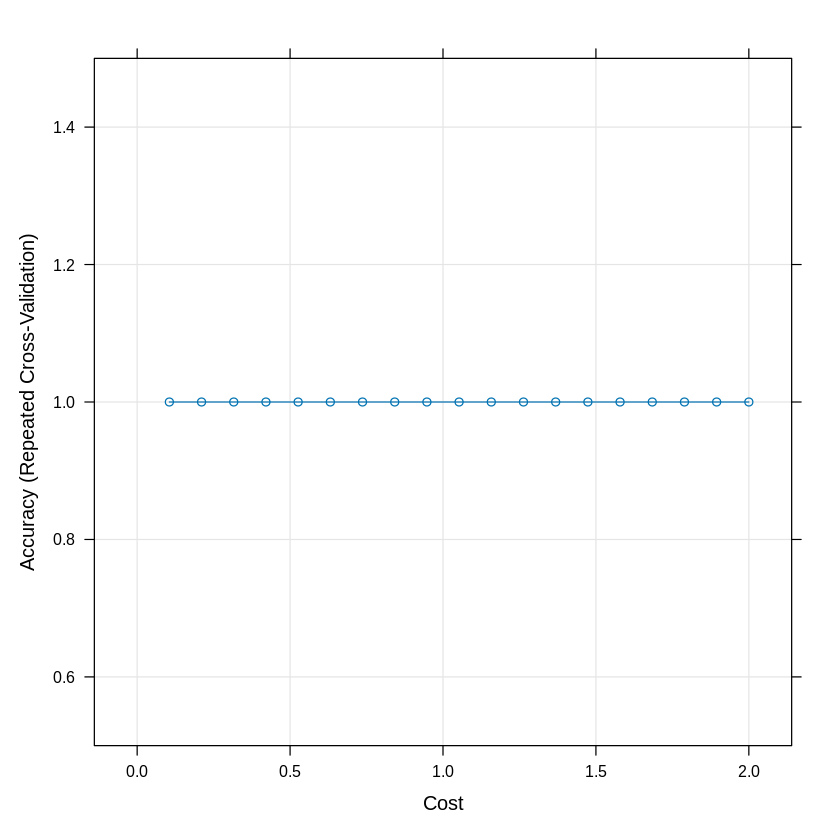

In [ ]:
# Plot model accuracy vs different values of Cost
plot(svm3)


This R code generates a plot of model accuracy versus different values of the cost parameter (C) for the trained linear Support Vector Machine (SVM) model with hyperparameter tuning (svm3). The plot provides insights into how the model's performance varies with different cost values, helping to identify an optimal setting for the cost parameter.

#### **7.5.4. Print the best tuning parameter, i.e. C value.**

In [ ]:
# Print the best tuning parameter C that
# maximizes model accuracy
svm2$bestTune

,C
,<dbl>
1,1



This R code employs hyperparameter tuning for a linear Support Vector Machine (SVM) model (svm3). It explores different values of the cost parameter (C) in a specified range and identifies the optimal value that maximizes model accuracy. The best tuning parameter, along with the associated accuracy, is then printed.

#### **7.5.5. Save results.**

In [ ]:
#save the results
res2<-as_tibble(svm2$results[which.min(svm2$results[,2]),])
res2

C,Accuracy,Kappa,AccuracySD,KappaSD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9539947,0.9291751,0.08179617,0.1255144



This R code saves the results of the linear Support Vector Machine (SVM) model with normalization (svm2) and creates a tibble (res2) containing the row with the minimum value in terms of the second column (performance metric). The resulting tibble provides details about the best-performing configuration of the model.

## **8. SVM classifier using Non-Linear Kernel.**

## **8.1. Computing SVM using radial basis kernel:**

### **8.1.1. Fit SVM-RBF model.**

In [ ]:
# Fit the SVM-RBF  model
svm_rbf <- train(class ~., data = training_set, method = "svmRadial", trControl = train_control, preProcess = c("center","scale"), tuneLength = 10)


This R code fits a Support Vector Machine with Radial Basis Function (SVM-RBF) kernel model (svm_rbf) using the "svmRadial" method from the "caret" package. The model includes normalization with mean centering and scaling and is trained with the cross-validation settings specified in the "train_control" object. The tuneLength parameter is set to 10, indicating the number of values to explore during hyperparameter tuning.

### **8.1.2. Get best tuning parameters.**

In [ ]:
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_rbf$bestTune

,sigma,C
,<dbl>,<dbl>
4,7.988829e-05,2



This R code prints the best tuning parameters (sigma and C) that maximize model accuracy for the Support Vector Machine with Radial Basis Function (SVM-RBF) model (svm_rbf).

### **8.1.3. Save model.**

In [ ]:
#Save the model
save(svm_rbf, file = "SVM_RBF.rda")


This R code saves the trained Support Vector Machine with Radial Basis Function (SVM-RBF) model (svm_rbf) to a file named "SVM_RBF.rda" using the save function. The saved model can be loaded later for further analysis or predictions.

### **8.1.4. save results.**

In [ ]:
#save the results
res3<-as_tibble(svm_rbf$results[which.min(svm_rbf$results[,2]),])
res3

sigma,C,Accuracy,Kappa,AccuracySD,KappaSD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.988829e-05,0.25,0.5140212,0,0.06089902,0



This R code saves the results of the Support Vector Machine with Radial Basis Function (SVM-RBF) model (svm_rbf) and creates a tibble (res3) containing the row with the minimum value in terms of the second column (performance metric). The resulting tibble provides details about the best-performing configuration of the SVM-RBF model.

### **8.1.5. Prediction on Test Data using the predict function.**

In [ ]:
# Prediction on test data
predictions_svm_rbf <- predict(svm_rbf, test_set)
predictions_svm_rbf

[1] Normallike Basal      Claudinlow Luminal    Basal      Luminal    Luminal   
[8] Luminal    Luminal   
Levels: Basal Claudinlow Luminal Normallike


This R code makes predictions on the test dataset using the trained Support Vector Machine with Radial Basis Function (SVM-RBF) model (svm_rbf). The resulting predictions are stored in the variable named "predictions_svm_rbf."

### **8.1.6. Create confusion matrix.**

In [ ]:
#Create confusion matrix
SVM_rbf_cm_matrix <- confusionMatrix(as.factor(predictions_svm_rbf), as.factor(test_set$class))
print(SVM_rbf_cm_matrix)

Confusion Matrix and Statistics

            Reference
Prediction   Basal Claudinlow Luminal Normallike
  Basal          2          0       0          0
  Claudinlow     0          1       0          0
  Luminal        0          0       5          0
  Normallike     0          0       0          1

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6637, 1)
    No Information Rate : 0.5556     
    P-Value [Acc > NIR] : 0.005041   
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Basal Class: Claudinlow Class: Luminal
Sensitivity                1.0000            1.0000         1.0000
Specificity                1.0000            1.0000         1.0000
Pos Pred Value             1.0000            1.0000         1.0000
Neg Pred Value             1.0000            1.


This R code creates a confusion matrix (SVM_rbf_cm_matrix) using the "confusionMatrix" function from the "caret" package. The confusion matrix provides a summary of the model's performance on the test dataset. The resulting confusion matrix is then printed.

## **8.2. Computing SVM using polynomial basis kernel:**

### **8.2.1. Fit SVM polynomial model.**

In [ ]:
# Fit the model
svm_poly <- train(class ~., data = training_set, method = "svmPoly", trControl = train_control, tuneLength = 4)


This R code fits a Support Vector Machine with Polynomial kernel model (svm_poly) using the "svmPoly" method from the "caret" package. The model is trained with the cross-validation settings specified in the "train_control" object, and hyperparameter tuning is performed with a length of 4 different values.

### **8.2.2. Best tuning parameters.**

In [ ]:
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_poly$bestTune

,degree,scale,C
,<int>,<dbl>,<dbl>
1,1,0.001,0.25



This R code prints the best tuning parameters (sigma and C) that maximize model accuracy for the Support Vector Machine with Polynomial kernel model (svm_poly).

### **8.2.3. Save model.**

In [ ]:
#Save the model
save(svm_poly, file = "SVM_polynomial.rda")


This R code saves the trained Support Vector Machine with Polynomial kernel model (svm_poly) to a file named "SVM_polynomial.rda" using the save function. The saved model can be loaded later for further analysis or predictions.

### **8.2.4. Save Results.**

In [ ]:
#save the results
res4<-as_tibble( svm_poly$results[which.min( svm_poly$results[,2]),])
res4

degree,scale,C,Accuracy,Kappa,AccuracySD,KappaSD
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.001,0.25,1,1,0,0



This R code saves the results of the Support Vector Machine with Polynomial kernel model (svm_poly) and creates a tibble (res4) containing the row with the minimum value in terms of the second column (performance metric). The resulting tibble provides details about the best-performing configuration of the SVM-Polynomial model.

### **8.2.5. Test prediction**

In [ ]:
# Prediction on test data
predictions_svm_poly <- predict( svm_poly, test_set)
predictions_svm_poly

[1] Normallike Basal      Claudinlow Luminal    Basal      Luminal    Luminal   
[8] Luminal    Luminal   
Levels: Basal Claudinlow Luminal Normallike


This R code makes predictions on the test dataset using the trained Support Vector Machine with Polynomial kernel model (svm_poly). The resulting predictions are stored in the variable named "predictions_svm_poly."

### **8.2.6. Confusion Matrix.**

In [ ]:
# Create confusion matrix
SVM_poly_cm_matrix <- confusionMatrix(as.factor(predictions_svm_poly), as.factor(test_set$class))
print(SVM_poly_cm_matrix)

Confusion Matrix and Statistics

            Reference
Prediction   Basal Claudinlow Luminal Normallike
  Basal          2          0       0          0
  Claudinlow     0          1       0          0
  Luminal        0          0       5          0
  Normallike     0          0       0          1

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6637, 1)
    No Information Rate : 0.5556     
    P-Value [Acc > NIR] : 0.005041   
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Basal Class: Claudinlow Class: Luminal
Sensitivity                1.0000            1.0000         1.0000
Specificity                1.0000            1.0000         1.0000
Pos Pred Value             1.0000            1.0000         1.0000
Neg Pred Value             1.0000            1.


This R code creates a confusion matrix (SVM_poly_cm_matrix) using the "confusionMatrix" function from the "caret" package. The confusion matrix provides a summary of the model's performance on the test dataset. The resulting confusion matrix is then printed.

### **8.2.7. Compare all the models.**

In [ ]:
library(dplyr)

df <- tibble(Model = c('SVM Linear', 'SVM Linear w/ choice of cost', 'SVM Radial', 'SVM Poly'),
             Accuracy = c(svm1$results[2][[1]], res2$Accuracy, res3$Accuracy, res4$Accuracy))

df %>% arrange(Accuracy)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Model,Accuracy
<chr>,<dbl>
SVM Radial,0.5140212
SVM Linear w/ choice of cost,0.9539947
SVM Linear,1.0000000
SVM Poly,1.0000000



This R code creates a tibble named df with information about different SVM models and their corresponding accuracy values. The tibble is then arranged in ascending order based on the "Accuracy" column using the arrange function from the "dplyr" package.

# **Random Forest**

## **Random search.**

In [ ]:
ntree <- 3
tr_control <- trainControl(method='repeatedcv', number=3, repeats=2, search = 'random')


This R code sets the number of trees (ntree) in a random forest model to 3, indicating that the ensemble will consist of three decision trees. The trainControl object (tr_control) is configured for hyperparameter tuning using repeated cross-validation with 3 folds and 2 repeats. The 'random' search method suggests that hyperparameter combinations will be sampled randomly during the tuning process. This setup is common for optimizing model performance through hyperparameter tuning in machine learning tasks, providing robustness through repeated evaluations.

### **Random generate 15 mtry values with tuneLength = 15**

Random Forest 

  43 samples
6916 predictors
   4 classes: 'Basal', 'Claudinlow', 'Luminal', 'Normallike' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 2 times) 
Summary of sample sizes: 28, 29, 29, 27, 30, 29, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   270  0.8511676  0.7564487
   330  0.8288462  0.7197306
   597  0.8622787  0.7765807
  1301  0.8622787  0.7757588
  1533  0.8392628  0.7366984
  2177  0.8637668  0.7782252
  2347  0.8526557  0.7587832
  3379  0.8288462  0.7194144
  4050  0.8392628  0.7366984
  4065  0.8288462  0.7194144
  4567  0.8288462  0.7194144
  4775  0.8526557  0.7591046
  5026  0.8407509  0.7396705
  5307  0.8518620  0.7592968
  6070  0.8407509  0.7396705

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2177.


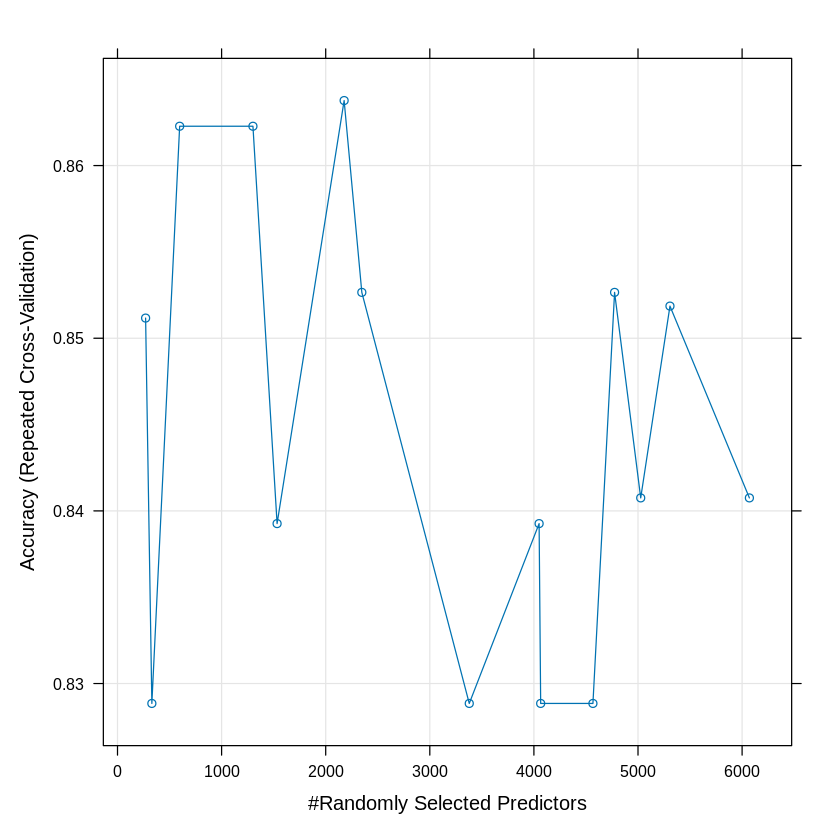

In [ ]:
set.seed(1)

#Fit random forest model
rf_random <- train(class ~ ., data = training_set, method = 'rf', metric = 'Accuracy', tuneLength = 15, trControl = tr_control)
print(rf_random)


#plot model at different parameters
plot(rf_random)


In this R code snippet, the random seed is set to 1 (set.seed(1)) for reproducibility. A random forest model (rf_random) is then trained using the "caret" package's train function. The model is tuned over 15 different hyperparameter values (tuneLength = 15) for the 'Accuracy' metric using repeated cross-validation. The results are printed, and a plot is generated to visualize the model's performance across different hyperparameter values, aiding in the selection of optimal parameters.

## **Grid Search**

### Cross-validation

In [ ]:
#Create control function for training with 3 folds and keep 2 folds for training. search method is grid.
tr_control <- trainControl(method='repeatedcv', number=3, repeats=2, search='grid')


The provided R code creates a control function (tr_control) for training a machine learning model. It uses the repeated cross-validation method with 3 folds and 2 repeats (method='repeatedcv', number=3, repeats=2). The search method is set to 'grid', indicating that a grid of hyperparameter values will be systematically explored during the training process. This control function is often used with the train function from the "caret" package for hyperparameter tuning, providing a structured approach to evaluating model performance across different parameter combinations.

### **Tune parameters**

In [ ]:
#create tunegrid with 15 values from 1:15 for mtry to tuning model. Our train function will change number of entry variable at each split according to tunegrid.
tunegrid <- expand.grid(.mtry = (1:15))


The provided R code creates a tuning grid (tunegrid) for the "mtry" parameter in a random forest model. The tuning grid is constructed using expand.grid with values ranging from 1 to 15 for the "mtry" parameter.
This tuning grid is commonly used in conjunction with the train function for hyperparameter tuning, where the model is trained and evaluated with different values of "mtry" to identify the optimal parameter setting that maximizes performance.

### Fit model

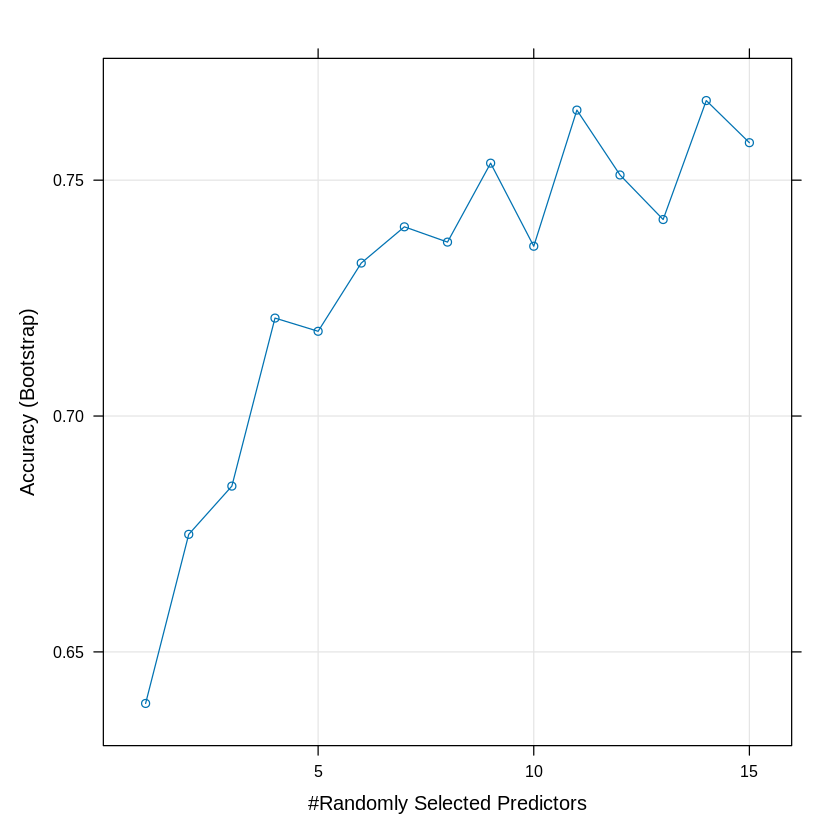

In [ ]:
#fit model
rf_gridsearch <- train(class ~ ., data = training_set, method = 'rf', metric = 'Accuracy', tuneGrid = tunegrid)

# Plot Grid Search
plot(rf_gridsearch)


This R code fits a random forest model (rf_gridsearch) using the "train" function from the "caret" package. It performs a grid search over the "mtry" hyperparameter values ranging from 1 to 15, aiming to maximize classification accuracy on the training set. The subsequent plot visualizes the model's performance across different "mtry" values, assisting in the identification of the optimal hyperparameter setting.

# **Decision Tree (DT)**

## **Develop decision tree model. By default metric is accuracy, but you can also set ROC.**

Call:
(function (formula, data, weights, subset, na.action = na.rpart, 
    method, model = FALSE, x = FALSE, y = TRUE, parms, control, 
    cost, ...) 
{
    Call <- match.call()
    if (is.data.frame(model)) {
        m <- model
        model <- FALSE
    }
    else {
        indx <- match(c("formula", "data", "weights", "subset"), 
            names(Call), nomatch = 0)
        if (indx[1] == 0) 
            stop("a 'formula' argument is required")
        temp <- Call[c(1, indx)]
        temp$na.action <- na.action
        temp[[1]] <- quote(stats::model.frame)
        m <- eval.parent(temp)
    }
    Terms <- attr(m, "terms")
    if (any(attr(Terms, "order") > 1)) 
        stop("Trees cannot handle interaction terms")
    Y <- model.response(m)
    wt <- model.weights(m)
    if (any(wt < 0)) 
        stop("negative weights not allowed")
    if (!length(wt)) 
        wt <- rep(1, nrow(m))
    offset <- model.offset(m)
    X <- rpart.matrix(m)
    nobs <- nrow(X)
    nvar <- ncol(X)


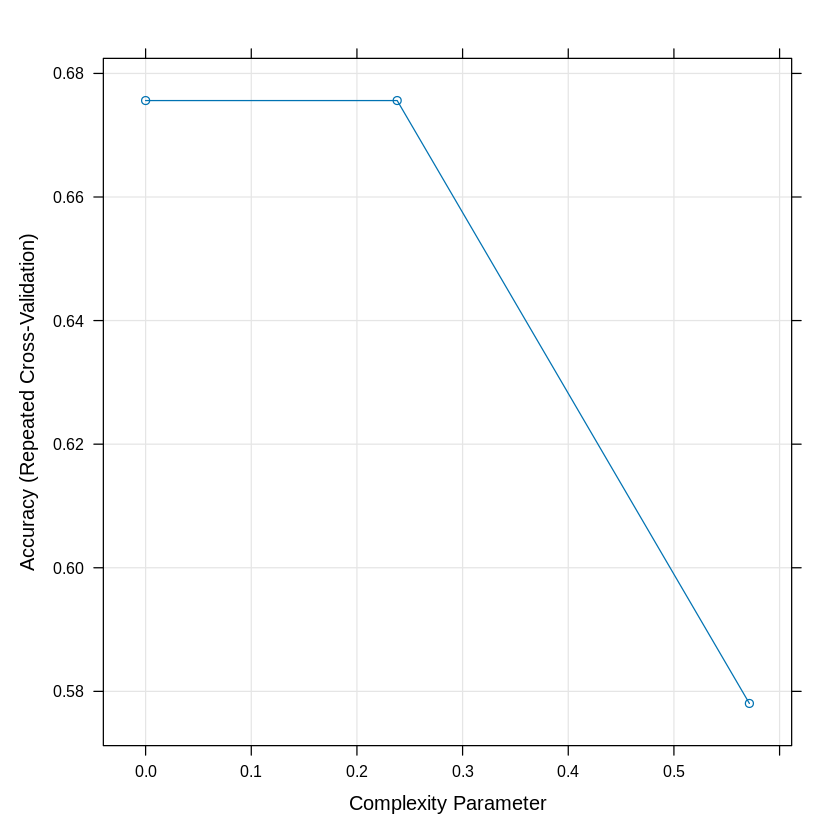

In [ ]:
# Develop decision tree model
dec_tree <- train(class ~ ., data=training_set, method="rpart", trControl = train_control)
#dec_tree <- train(class ~ ., data=training_set, method="rpart", trControl = train_control, metric = "ROC")


#train results
train_results <- dec_tree$results
train_predictions <- dec_tree$pred [1:8]


#Best parameters
best_parameters <- dec_tree$bestTune


# Summary of model
summary(dec_tree$finalModel)


#plot decision tree with accuracy at diffferent complexity parameters
plot(dec_tree)


The code employs the "caret" package in R to train a decision tree model (dec_tree) using the CART algorithm ("rpart" method). It evaluates the model's performance with repeated cross-validation, storing results in train_results. Predictions on the first 8 instances are captured in train_predictions. The optimal hyperparameters are stored in best_parameters, and a summary of the final model is provided. The decision tree is visualized with accuracy at different complexity parameters using plot(dec_tree).

,cp
,<dbl>
2,0.2380952


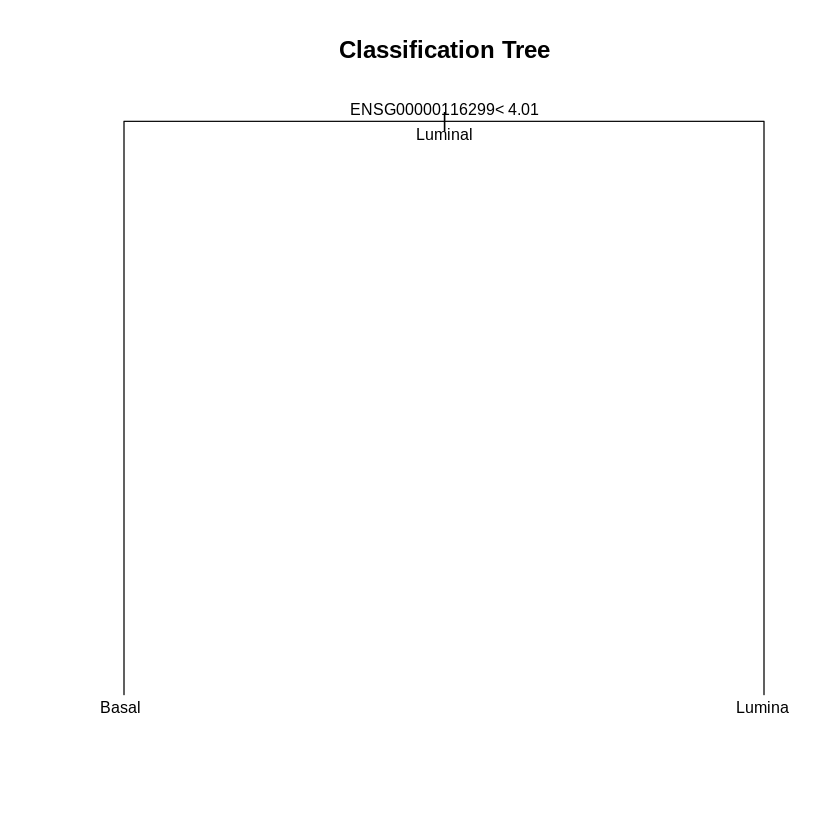

In [ ]:
# Print the best tuning parameter cp that maximizes the model accuracy
dec_tree$bestTune


# Plot the final tree model
plot(dec_tree$finalModel, uniform=TRUE, main="Classification Tree")
text(dec_tree$finalModel, use.n.=TRUE, all=TRUE, cex=.8)


The code prints the best tuning parameter cp that maximizes the model accuracy for the decision tree (dec_tree). It then plots the final tree model, ensuring a uniform scale, and adds text annotations to visualize the classification tree.

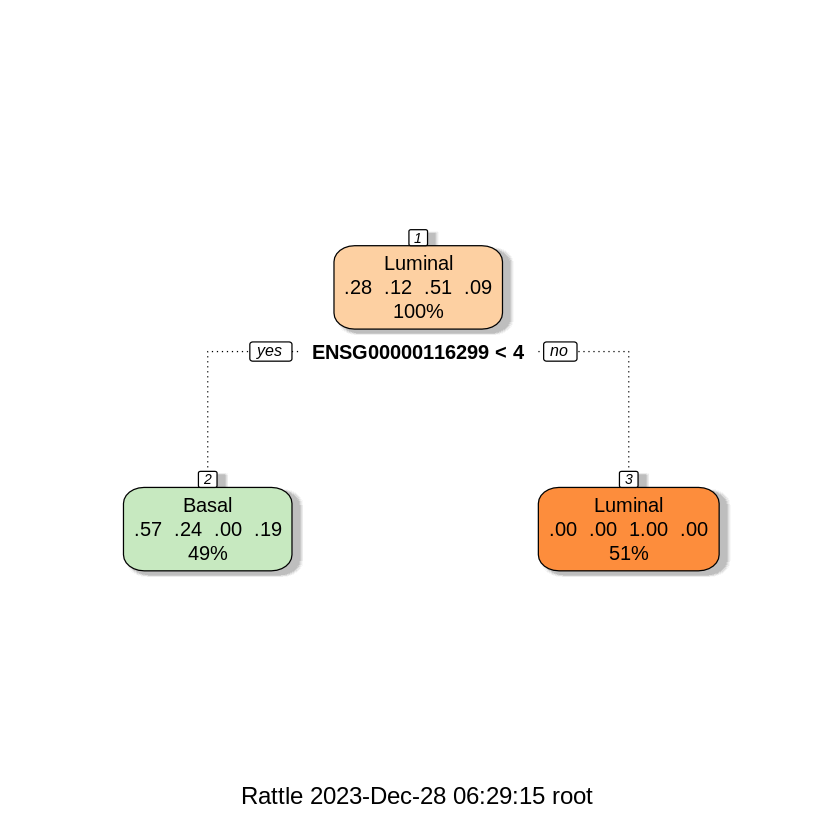

In [ ]:
# draw colorful decision tree
fancyRpartPlot(dec_tree$finalModel)


The code uses the fancyRpartPlot function from the "rattle" package to draw a colorful decision tree visualization for the final model (dec_tree$finalModel).

In [ ]:
#prepare test data for test prediction
test_set1 <- test_set[2:ncol(test_set)]


# Test predictions
test_prediction <- predict(dec_tree, newdata = test_set1)
test_prediction




# Compute model accuracy rate on test data
test_accuracy <- round(mean(test_prediction == test_set$class),2)
test_accuracy
#Error rate
error.rate = round(mean(test_prediction != test_set$class),2)
error.rate


#Performance measures on test data
Results <- confusionMatrix(data = as.factor(test_prediction), reference = as.factor(test_set$class))


Results1 <- confusionMatrix(data = as.factor(test_prediction), reference = as.factor(test_set$class), mode = "prec_recall")


Accuracy <- Results$overall


Confusion_mat <- Results$table


Perf_measures <- Results$byClass


This R code uses the decision tree model (dec_tree) to predict class labels for the test data (test_set1). It then calculates the accuracy rate, error rate, and various performance measures, including an overall accuracy summary (Accuracy), confusion matrix (Confusion_mat), and class-specific performance measures (Perf_measures). These metrics provide insights into the model's performance on the unseen test data.

In [ ]:
install.packages("pROC")
library(pROC)

tr_pred <- predict(dec_tree, newdata=training_set[2:ncol(training_set)])
tr_pred


roc_tr <-  multiclass.roc(training_set$class,as.numeric(tr_pred), percent=TRUE, plot=TRUE, print.auc=TRUE)
roc_tr


roc_te <-  multiclass.roc(test_set$class,as.numeric(test_prediction), percent=TRUE, plot=TRUE, print.auc=TRUE)
roc_te


This R code installs and loads the pROC package, then uses the decision tree model (dec_tree) to predict class labels for both the training set (training_set) and the test set (test_set). Subsequently, it calculates and plots the Receiver Operating Characteristic (ROC) curves for both the training and test predictions, providing insights into the model's ability to discriminate between different classes.

In [ ]:
#Roc plot
pred <- predict(dec_tree, newdata=test_set1, type="prob")
roc <- evalm(data.frame(pred, test_set$Class))

#ROC plot for train

pred_tr <- predict(dec_tree, newdata=training_set[2:ncol(training_set)], type="prob")


roc_tr <- evalm(data.frame(pred_tr, training_set$Class))

ERROR: ignored

This R code uses the predict function to obtain class probabilities (type="prob") for both the test set (test_set1) and the training set (training_set). Subsequently, it employs the evalm function to compute and plot the Receiver Operating Characteristic (ROC) curves for both the test and training sets, providing a visual representation of the model's discriminatory performance.